In [0]:
import keras
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
import numpy as np
from tensorflow.keras.optimizers import RMSprop


Using TensorFlow backend.



**Import CIFAR10 Dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 13s 0us/step


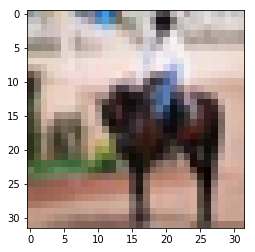

In [0]:
#Plot an images

import matplotlib.pyplot as plt
plt.imshow(x_train[11])


In [0]:
print(x_train[11])

[[[142 149 152]
  [172 172 167]
  [176 168 154]
  ...
  [216 212 211]
  [198 194 193]
  [205 202 200]]

 [[191 190 192]
  [196 192 190]
  [174 166 159]
  ...
  [229 222 220]
  [222 215 213]
  [217 210 207]]

 [[220 212 212]
  [217 209 208]
  [192 183 182]
  ...
  [224 214 209]
  [225 214 210]
  [218 208 203]]

 ...

 [[197 152 136]
  [196 152 135]
  [201 156 140]
  ...
  [200 165 146]
  [199 165 146]
  [205 164 150]]

 [[196 157 139]
  [191 152 135]
  [193 154 136]
  ...
  [198 164 144]
  [199 165 145]
  [201 161 146]]

 [[186 150 133]
  [182 147 130]
  [174 139 121]
  ...
  [158 124 105]
  [158 125 106]
  [163 125 111]]]


In [0]:
print(y_train[11])

[7]


**Change class vectors to binary class matrices**

In [0]:
num_classes = 10 #define the number of classes possible.

print('before',y_test[0])

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('after',y_test[0])

#Normalize
x_train  = x_train / 255.0
x_test = x_test / 255.0


before [3]
after [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:

print(y_train[11])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


**Initiate the model**

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])




W0707 20:55:11.262454 140374284228480 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Compile & Train the model**

In [0]:

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
50000/50000 [==============================] - 8s 157us/sample - loss: 0.2221 - acc: 0.9170
Epoch 2/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.2214 - acc: 0.9172
Epoch 3/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.2215 - acc: 0.9173
Epoch 4/20
50000/50000 [==============================] - 8s 152us/sample - loss: 0.2220 - acc: 0.9170
Epoch 5/20
50000/50000 [==============================] - 8s 151us/sample - loss: 0.2210 - acc: 0.9175
Epoch 6/20
50000/50000 [==============================] - 7s 149us/sample - loss: 0.2204 - acc: 0.9176
Epoch 7/20
50000/50000 [==============================] - 8s 150us/sample - loss: 0.2205 - acc: 0.9173
Epoch 8/20
50000/50000 [==============================] - 7s 150us/sample - loss: 0.2201 - acc: 0.9176
Epoch 9/20
50000/50000 [==============================] - 8s 150us/sample - loss: 0.2203 - acc: 0.9178
Epoch 10/20
50000/50000 [==============================] - 7s 150us/sampl

**Evaluate the model & summarize**

In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.2763 - acc: 0.9007


[0.2762890439987183, 0.90073025]

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  3146752   
_________________________________________________________________
dense_1 (Dense)              multiple                  131200    
_________________________________________________________________
dense_2 (Dense)              multiple                  1290      
Total params: 3,279,242
Trainable params: 3,279,242
Non-trainable params: 0
_________________________________________________________________


**Prediction**

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  

  print(classes)
  
classes2 = np.argmax(classes, axis=1)

if classes2[0] == 0:
        print('It is an airplane')
elif classes2[0] == 1:
        print('It is an automobile')
elif classes2[0] == 2:
        print('It is a bird')
elif classes2[0] == 3:
        print('It is a cat')
elif classes2[0] == 4:
        print('It is a deer')
elif classes2[0] == 5:
        print('It is a dog')
elif classes2[0] == 6:
        print('It is a frog')
elif classes2[0] == 7:
        print('It is a horse')    
elif classes2[0] == 8:
        print('It is a ship')
elif classes2[0] == 9:
        print('It is a truck')    
else:
        print('Can\'t recognize the image')

print('done')

Saving Truck Img.png to Truck Img (2).png
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
It is an automobile
done
